<a href="https://colab.research.google.com/github/Cv103/DSA/blob/main/perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install -- celluloid
from IPython.display import HTML
from celluloid import Camera
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [80]:
x=np.array([[-1,-2,10],[-4,-5,15],
  [-7,-4,13],[-9,-6,12],[-6,-2,8],
  [13,7,-20],[12,5,-19],[7,9,-10],
  [10,10,-12]])
y=np.array([1,1,1,1,1,0,0,0,0])

In [97]:
class perceptron ():
    def __init__(self,epoch=10,lr=0.1):
        self.epoch=epoch
        self.lr=lr
        self.w=np.ones(4)
        self.error=[]
        self.ws=[]
    
    def pred(self,val):
        if val>=0:  
            return 1
        else:
            return 0
    
    def compute(self,inp,label):
        for i in range(self.epoch):
            for j in range(len(inp)):
                x=np.insert(inp[j],0,1)
                y=x.dot(self.w)
                out=self.pred(y)
                e=label[j]-out
                self.error.append(e)
                self.ws.append(self.w)
                self.w=self.w+self.lr*e*x
     
    def get(self):
        return self.error,self.ws

In [98]:
ex=perceptron ()
ex.compute(x,y)

In [99]:
e,w=ex.get()

Text(0.5, 1.0, 'error graph')

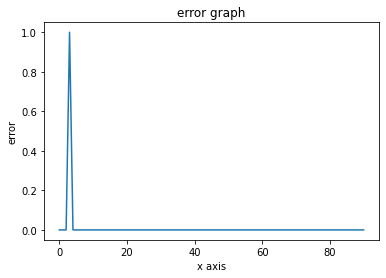

In [100]:
plt.plot(np.linspace(0,90,90),e)
plt.xlabel("x axis")
plt.ylabel("error")
plt.title("error graph")

In [117]:
y_=np.array([1,1,1,1,1,0,0,0,0])
gX=np.arange(-10,10,0.01)
gY=gX
GX,GY=np.meshgrid(gX,gY)

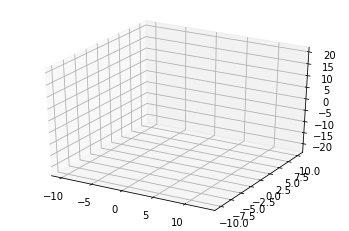

In [118]:
fig=plt.figure()
ax=fig.add_subplot(111, projection="3d")
camera=Camera (fig)
for i in w[:10]:
    gZ=-(i[0]/i[3])-(i[2]/i[3])*GY-(i[1]/i[0])*GX
    ax.plot_wireframe(GX,GY,gZ)
    ax.scatter(x[::,0:1:],x[::,1:2],x[::,2::],c=y_)
    camera.snap()
animation=camera.animate()

In [116]:
HTML(animation.to_html5_video())